In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sys
import os

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

## Dataset files

In [2]:
file_list = os.listdir('../data/saturation/datasets')
file_list[:5]

['dataScaleFree_10_10_7_16000_B.txt',
 'dataScaleFree_10_10_12_16000_M.txt',
 'dataScaleFree_10_10_13_16000_U.txt',
 'dataScaleFree_10_10_54_16000_M.txt',
 'dataScaleFree_10_10_2_16000_B.txt']

In [3]:
for i in range(1, 21):
    file = f'dataScaleFree_10_10_{i}_16000_U.txt'
    print(f'File {file} in dir: {file in file_list}')

File dataScaleFree_10_10_1_16000_U.txt in dir: True
File dataScaleFree_10_10_2_16000_U.txt in dir: True
File dataScaleFree_10_10_3_16000_U.txt in dir: True
File dataScaleFree_10_10_4_16000_U.txt in dir: True
File dataScaleFree_10_10_5_16000_U.txt in dir: True
File dataScaleFree_10_10_6_16000_U.txt in dir: True
File dataScaleFree_10_10_7_16000_U.txt in dir: True
File dataScaleFree_10_10_8_16000_U.txt in dir: True
File dataScaleFree_10_10_9_16000_U.txt in dir: True
File dataScaleFree_10_10_10_16000_U.txt in dir: True
File dataScaleFree_10_10_11_16000_U.txt in dir: True
File dataScaleFree_10_10_12_16000_U.txt in dir: True
File dataScaleFree_10_10_13_16000_U.txt in dir: True
File dataScaleFree_10_10_14_16000_U.txt in dir: True
File dataScaleFree_10_10_15_16000_U.txt in dir: True
File dataScaleFree_10_10_16_16000_U.txt in dir: True
File dataScaleFree_10_10_17_16000_U.txt in dir: True
File dataScaleFree_10_10_18_16000_U.txt in dir: True
File dataScaleFree_10_10_19_16000_U.txt in dir: True
Fi

## Loss function

In [4]:
import tensorflow.keras.backend as kb

In [5]:
def custom_loss(y_true,y_pred):
    custom_loss=kb.mean(kb.square(y_true-y_pred))
    return custom_loss

## One Hidden Layer Model

In [6]:
error_dict = {}
for i in range(1, 21):
    file = f'../data/saturation/datasets/dataScaleFree_10_10_{i}_16000_U.txt'
    data = pd.read_table(file, sep=' ', header=None)
    
    X = data.iloc[:, :100]
    y = data.iloc[:, 100:200]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2 / 0.8, random_state=42)
    
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    X_val = np.array(X_val)
    y_val = np.array(y_val)

    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(100, 
                            input_shape=(100,), 
                            activation='sigmoid',
                            kernel_regularizer=tf.keras.regularizers.l2(0.00003)),
      tf.keras.layers.Dense(100, 
                            activation='sigmoid',
                            kernel_regularizer=tf.keras.regularizers.l2(0.00003))
    ])

    model.compile(optimizer='adam',
                  loss=custom_loss)

    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
    model.fit(X_train, 
              y_train, 
              epochs=7500000, 
              callbacks=[callback], 
              validation_data=(X_val, y_val),
              verbose=0)
    
    test_error = custom_loss(y_test, model.predict(X_test))
    print(i, test_error)
    error_dict[i] = test_error

1 tf.Tensor(2.7132919323968653e-05, shape=(), dtype=float64)
2 tf.Tensor(1.8432557526155823e-05, shape=(), dtype=float64)
3 tf.Tensor(2.1635962692220048e-05, shape=(), dtype=float64)
4 tf.Tensor(3.486140770006545e-05, shape=(), dtype=float64)
5 tf.Tensor(6.504803909303167e-05, shape=(), dtype=float64)
6 tf.Tensor(0.00010697998905584423, shape=(), dtype=float64)
7 tf.Tensor(0.00019521623391039874, shape=(), dtype=float64)
8 tf.Tensor(0.0003862335270674476, shape=(), dtype=float64)
9 tf.Tensor(0.0008144726264583031, shape=(), dtype=float64)
10 tf.Tensor(0.0017334620351826947, shape=(), dtype=float64)
11 tf.Tensor(0.005684019583902266, shape=(), dtype=float64)
12 tf.Tensor(0.02636248751074505, shape=(), dtype=float64)
13 tf.Tensor(0.1017571161248787, shape=(), dtype=float64)
14 tf.Tensor(0.28815700907331904, shape=(), dtype=float64)
15 tf.Tensor(0.6096876921481527, shape=(), dtype=float64)
16 tf.Tensor(1.1152145637720028, shape=(), dtype=float64)
17 tf.Tensor(1.8451065443984227, shape=(),

In [7]:
error_dict_linear = {}
for i in range(1, 21):
    file = f'../data/saturation/datasets/dataScaleFree_10_10_{i}_16000_U.txt'
    data = pd.read_table(file, sep=' ', header=None)
    
    X = data.iloc[:, :100]
    y = data.iloc[:, 100:200]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2 / 0.8, random_state=42)
    
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    X_val = np.array(X_val)
    y_val = np.array(y_val)

    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(100, 
                            input_shape=(100,), 
                            activation='sigmoid',
                            kernel_regularizer=tf.keras.regularizers.l2(0.00003)),
      tf.keras.layers.Dense(100, 
                            activation='linear',
                            kernel_regularizer=tf.keras.regularizers.l2(0.00003))
    ])

    model.compile(optimizer='adam',
                  loss=custom_loss)

    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
    model.fit(X_train, 
              y_train, 
              epochs=7500000, 
              callbacks=[callback], 
              validation_data=(X_val, y_val),
              verbose=0)
    
    test_error = custom_loss(y_test, model.predict(X_test))
    print(i, test_error)
    error_dict_linear[i] = test_error

1 tf.Tensor(3.300801580141056e-05, shape=(), dtype=float64)
2 tf.Tensor(2.400410622997377e-05, shape=(), dtype=float64)
3 tf.Tensor(2.898516580454646e-05, shape=(), dtype=float64)
4 tf.Tensor(4.1304243926201994e-05, shape=(), dtype=float64)
5 tf.Tensor(6.79039421381723e-05, shape=(), dtype=float64)
6 tf.Tensor(0.00012138802777017098, shape=(), dtype=float64)
7 tf.Tensor(0.00019669591095911485, shape=(), dtype=float64)
8 tf.Tensor(0.0002864765204125403, shape=(), dtype=float64)
9 tf.Tensor(0.00037634444325235135, shape=(), dtype=float64)
10 tf.Tensor(0.0007479982200028114, shape=(), dtype=float64)
11 tf.Tensor(0.0036205489151092288, shape=(), dtype=float64)
12 tf.Tensor(0.008129793315482194, shape=(), dtype=float64)
13 tf.Tensor(0.012076949321432055, shape=(), dtype=float64)
14 tf.Tensor(0.02251470156209572, shape=(), dtype=float64)
15 tf.Tensor(0.051471363822857885, shape=(), dtype=float64)
16 tf.Tensor(0.03795299169764946, shape=(), dtype=float64)
17 tf.Tensor(0.05334915457406386, sha

In [8]:
error_dict_linear

{1: <tf.Tensor: shape=(), dtype=float64, numpy=3.300801580141056e-05>,
 2: <tf.Tensor: shape=(), dtype=float64, numpy=2.400410622997377e-05>,
 3: <tf.Tensor: shape=(), dtype=float64, numpy=2.898516580454646e-05>,
 4: <tf.Tensor: shape=(), dtype=float64, numpy=4.1304243926201994e-05>,
 5: <tf.Tensor: shape=(), dtype=float64, numpy=6.79039421381723e-05>,
 6: <tf.Tensor: shape=(), dtype=float64, numpy=0.00012138802777017098>,
 7: <tf.Tensor: shape=(), dtype=float64, numpy=0.00019669591095911485>,
 8: <tf.Tensor: shape=(), dtype=float64, numpy=0.0002864765204125403>,
 9: <tf.Tensor: shape=(), dtype=float64, numpy=0.00037634444325235135>,
 10: <tf.Tensor: shape=(), dtype=float64, numpy=0.0007479982200028114>,
 11: <tf.Tensor: shape=(), dtype=float64, numpy=0.0036205489151092288>,
 12: <tf.Tensor: shape=(), dtype=float64, numpy=0.008129793315482194>,
 13: <tf.Tensor: shape=(), dtype=float64, numpy=0.012076949321432055>,
 14: <tf.Tensor: shape=(), dtype=float64, numpy=0.02251470156209572>,
 1

In [10]:
error_dict_relu = {}
for i in range(1, 21):
    file = f'../data/saturation/datasets/dataScaleFree_10_10_{i}_16000_U.txt'
    data = pd.read_table(file, sep=' ', header=None)
    
    X = data.iloc[:, :100]
    y = data.iloc[:, 100:200]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2 / 0.8, random_state=42)
    
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    X_val = np.array(X_val)
    y_val = np.array(y_val)

    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(100, 
                            input_shape=(100,), 
                            activation='sigmoid',
                            kernel_regularizer=tf.keras.regularizers.l2(0.00003)),
      tf.keras.layers.Dense(100, 
                            activation='linear',
                            kernel_regularizer=tf.keras.regularizers.l2(0.00003))
    ])

    model.compile(optimizer='adam',
                  loss=custom_loss)

    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
    model.fit(X_train, 
              y_train, 
              epochs=7500000, 
              callbacks=[callback], 
              validation_data=(X_val, y_val),
              verbose=0)
    
    test_error = custom_loss(y_test, model.predict(X_test))
    print(i, test_error)
    error_dict_relu[i] = test_error

1 tf.Tensor(3.278905082135191e-05, shape=(), dtype=float64)
2 tf.Tensor(2.5633582879570175e-05, shape=(), dtype=float64)
3 tf.Tensor(2.9613227154787828e-05, shape=(), dtype=float64)
4 tf.Tensor(3.9801635056225645e-05, shape=(), dtype=float64)
5 tf.Tensor(6.716979665473787e-05, shape=(), dtype=float64)
6 tf.Tensor(0.00011178818625257966, shape=(), dtype=float64)
7 tf.Tensor(0.00019186508112256878, shape=(), dtype=float64)
8 tf.Tensor(0.00030470014700633607, shape=(), dtype=float64)
9 tf.Tensor(0.0003726005966256546, shape=(), dtype=float64)
10 tf.Tensor(0.0007911304317571705, shape=(), dtype=float64)
11 tf.Tensor(0.003645823363415544, shape=(), dtype=float64)
12 tf.Tensor(0.012947464952680293, shape=(), dtype=float64)
13 tf.Tensor(0.01204965978683174, shape=(), dtype=float64)
14 tf.Tensor(0.02219498446794624, shape=(), dtype=float64)
15 tf.Tensor(0.04433602497840522, shape=(), dtype=float64)
16 tf.Tensor(0.037995885348572386, shape=(), dtype=float64)
17 tf.Tensor(0.04584352292846525, sh

In [11]:
error_dict_relu

{1: <tf.Tensor: shape=(), dtype=float64, numpy=3.278905082135191e-05>,
 2: <tf.Tensor: shape=(), dtype=float64, numpy=2.5633582879570175e-05>,
 3: <tf.Tensor: shape=(), dtype=float64, numpy=2.9613227154787828e-05>,
 4: <tf.Tensor: shape=(), dtype=float64, numpy=3.9801635056225645e-05>,
 5: <tf.Tensor: shape=(), dtype=float64, numpy=6.716979665473787e-05>,
 6: <tf.Tensor: shape=(), dtype=float64, numpy=0.00011178818625257966>,
 7: <tf.Tensor: shape=(), dtype=float64, numpy=0.00019186508112256878>,
 8: <tf.Tensor: shape=(), dtype=float64, numpy=0.00030470014700633607>,
 9: <tf.Tensor: shape=(), dtype=float64, numpy=0.0003726005966256546>,
 10: <tf.Tensor: shape=(), dtype=float64, numpy=0.0007911304317571705>,
 11: <tf.Tensor: shape=(), dtype=float64, numpy=0.003645823363415544>,
 12: <tf.Tensor: shape=(), dtype=float64, numpy=0.012947464952680293>,
 13: <tf.Tensor: shape=(), dtype=float64, numpy=0.01204965978683174>,
 14: <tf.Tensor: shape=(), dtype=float64, numpy=0.02219498446794624>,
 

In [12]:
model.evaluate(X_test, y_test)

2000/2000 [==============================] - 0s 21us/sample - loss: 0.1099


0.10985002046823501

## Two layer model

In [13]:
error_dict2 = {}
for i in range(1, 21):
    file = f'../data/saturation/datasets/dataScaleFree_10_10_{i}_16000_U.txt'
    data = pd.read_table(file, sep=' ', header=None)
    
    X = data.iloc[:, :100]
    y = data.iloc[:, 100:200]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2 / 0.8, random_state=42)
    
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    X_val = np.array(X_val)
    y_val = np.array(y_val)

    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(100, 
                              input_shape=(100,), 
                              activation='sigmoid',
                              kernel_regularizer=tf.keras.regularizers.l2(0.00003)),
        tf.keras.layers.Dense(100, 
                              input_shape=(100,), 
                              activation='sigmoid',
                              kernel_regularizer=tf.keras.regularizers.l2(0.00003)),
        tf.keras.layers.Dense(100, 
                              activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.00003))
    ])

    model.compile(optimizer='adam',
                  loss='mean_squared_error')

    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
    model.fit(X_train, 
              y_train, 
              epochs=7500000, 
              callbacks=[callback], 
              validation_data=(X_val, y_val),
              verbose=0)
    
    test_error = custom_loss(y_test, model.predict(X_test))
    print(i, test_error)
    error_dict2[i] = test_error

1 tf.Tensor(0.00013990959980269465, shape=(), dtype=float64)
2 tf.Tensor(0.0003660621983379973, shape=(), dtype=float64)
3 tf.Tensor(0.0005026711147035163, shape=(), dtype=float64)
4 tf.Tensor(0.0003041467928288316, shape=(), dtype=float64)
5 tf.Tensor(7.405233135075284e-05, shape=(), dtype=float64)
6 tf.Tensor(0.0002625547438688514, shape=(), dtype=float64)
7 tf.Tensor(0.00031916447846437796, shape=(), dtype=float64)
8 tf.Tensor(0.0004150415781481473, shape=(), dtype=float64)
9 tf.Tensor(0.0008355082006875345, shape=(), dtype=float64)
10 tf.Tensor(0.0017411386861240308, shape=(), dtype=float64)
11 tf.Tensor(0.004620596526103397, shape=(), dtype=float64)
12 tf.Tensor(0.005432119973860152, shape=(), dtype=float64)
13 tf.Tensor(0.007628568360755449, shape=(), dtype=float64)
14 tf.Tensor(0.016706567943234947, shape=(), dtype=float64)
15 tf.Tensor(0.028487326130132225, shape=(), dtype=float64)
16 tf.Tensor(0.027147664222138636, shape=(), dtype=float64)
17 tf.Tensor(0.0185612216369291, shap

In [14]:
error_dict2

{1: <tf.Tensor: shape=(), dtype=float64, numpy=0.00013990959980269465>,
 2: <tf.Tensor: shape=(), dtype=float64, numpy=0.0003660621983379973>,
 3: <tf.Tensor: shape=(), dtype=float64, numpy=0.0005026711147035163>,
 4: <tf.Tensor: shape=(), dtype=float64, numpy=0.0003041467928288316>,
 5: <tf.Tensor: shape=(), dtype=float64, numpy=7.405233135075284e-05>,
 6: <tf.Tensor: shape=(), dtype=float64, numpy=0.0002625547438688514>,
 7: <tf.Tensor: shape=(), dtype=float64, numpy=0.00031916447846437796>,
 8: <tf.Tensor: shape=(), dtype=float64, numpy=0.0004150415781481473>,
 9: <tf.Tensor: shape=(), dtype=float64, numpy=0.0008355082006875345>,
 10: <tf.Tensor: shape=(), dtype=float64, numpy=0.0017411386861240308>,
 11: <tf.Tensor: shape=(), dtype=float64, numpy=0.004620596526103397>,
 12: <tf.Tensor: shape=(), dtype=float64, numpy=0.005432119973860152>,
 13: <tf.Tensor: shape=(), dtype=float64, numpy=0.007628568360755449>,
 14: <tf.Tensor: shape=(), dtype=float64, numpy=0.016706567943234947>,
 15

## Ploting

In [15]:
x = [x / 10 for x in range(1, 21)]
y1 = [x.numpy() for x in error_dict_relu.values()]
y2 = [x.numpy() for x in error_dict2.values()]

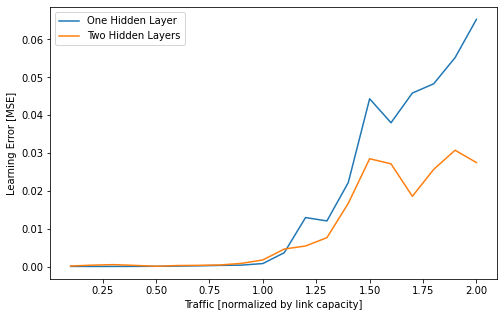

In [16]:
plt.figure(figsize=(8, 5))

plt.plot(x, y1, label='One Hidden Layer')
plt.plot(x, y2, label='Two Hidden Layers')

plt.xlabel('Traffic [normalized by link capacity]')
plt.ylabel('Learning Error [MSE]')

plt.legend()
plt.savefig('../plots/01_error_x_saturation.png')

## Checking intervals

In [17]:
error_dict = {}
max_mean = pd.DataFrame(columns=['rho', 'x_max', 'x_mean', 'y_max', 'y_mean', 'y_std'])
for i in range(1, 21):
    file = f'../data/saturation/datasets/dataScaleFree_10_10_{i}_16000_U.txt'
    data = pd.read_table(file, sep=' ', header=None)
    
    X = data.iloc[:, :100]
    y = data.iloc[:, 100:200]
    rho = i/10
    x_max = np.max(np.array(X))
    x_mean = np.mean(np.array(X))
    y_max = np.max(np.array(y))
    y_mean = np.mean(np.array(y))
    y_std = np.std(np.array(y))
    max_mean.loc[i - 1] = [rho, x_max, x_mean, y_max, y_mean, y_std]
max_mean    

,rho,x_max,x_mean,y_max,y_mean,y_std
0,0.1,0.111968,0.049516,0.358420,0.185908,0.095086
1,0.2,0.215322,0.099019,0.364855,0.192514,0.098748
2,0.3,0.318192,0.148527,0.375845,0.199860,0.102907
3,0.4,0.421877,0.198034,0.390543,0.208116,0.107659
4,0.5,0.524417,0.247543,0.426717,0.217502,0.113163
5,0.6,0.626015,0.297045,0.482026,0.228317,0.119664
6,0.7,0.725241,0.346550,0.571421,0.241014,0.127557
7,0.8,0.827174,0.396054,0.747965,0.256278,0.137532
8,0.9,0.930638,0.445563,1.273670,0.275305,0.151041
9,1.0,1.030120,0.495070,2.578770,0.300568,0.172525


No handles with labels found to put in legend.


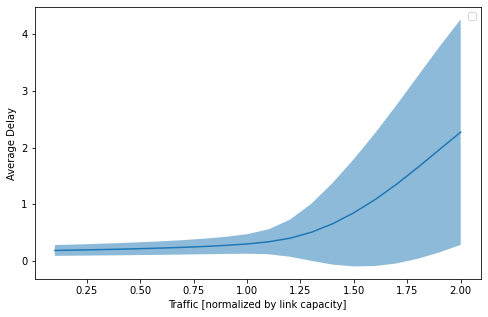

In [18]:
plt.figure(figsize=(8, 5))

x = max_mean.rho
y = max_mean.y_mean
y_std = max_mean.y_std
plt.plot(x, y)

plt.fill_between(x, y - y_std, y + y_std, alpha=0.5)

plt.xlabel('Traffic [normalized by link capacity]')
plt.ylabel('Average Delay')

plt.legend()
plt.savefig('../plots/01_avgdelay_x_saturation.png')